In [2]:
import pandas as pd

In [3]:
# Load all the files
transaction = pd.read_excel(r"C:\Users\brand\Downloads\Transaction.xlsx")
user = pd.read_excel(r"C:\Users\brand\Downloads\User.xlsx")
item = pd.read_excel(r"C:\Users\brand\Downloads\Item.xlsx")
updated_item = pd.read_excel(r"C:\Users\brand\Downloads\Updated_Item.xlsx")
type_df = pd.read_excel(r"C:\Users\brand\Downloads\Type.xlsx")
mode = pd.read_excel(r"C:\Users\brand\Downloads\Mode.xlsx")
region = pd.read_excel(r"C:\Users\brand\Downloads\Region.xlsx")
country = pd.read_excel(r"C:\Users\brand\Downloads\Country.xlsx")
continent = pd.read_excel(r"C:\Users\brand\Downloads\Continent.xlsx")
city = pd.read_excel(r"C:\Users\brand\Downloads\City.xlsx")

In [4]:

# Merge user with  continent
user = user.merge(continent, on="ContinentId", how="left")

In [5]:
# Merge user with region
user = user.merge(region[['RegionId', 'Region']], on="RegionId", how="left")

In [6]:
# Merge user with country
user = user.merge(country[['CountryId', 'Country']], on="CountryId", how="left")

In [7]:
# Merge user with city
user = user.merge(city[['CityId', 'CityName']], on="CityId", how="left")

In [8]:

# Merge transaction with updated attraction info
transaction = transaction.merge(updated_item, on="AttractionId", how="left")

In [9]:
# Merge the attraction type
transaction = transaction.merge(type_df, on="AttractionTypeId", how="left")

In [10]:
# Merge the visit mode name
transaction = transaction.merge(mode, left_on="VisitMode", right_on="VisitModeId", how="left")

In [11]:

# Merge user info into transaction
full_df = transaction.merge(user, on="UserId", how="left")

In [12]:
# renaming the columns
full_df.rename(columns={
    "VisitMode": "VisitModeId",
    "VisitMode_y": "VisitMode",
    "CityName": "UserCity",
    "Country": "UserCountry",
    "Region": "UserRegion",
    "Continent": "UserContinent",
    "CityId": "UserCityId"
}, inplace=True)

In [13]:
# Dropping unwanted columns
drop_cols = ["VisitModeId", "VisitModeId_y", "VisitMode_x", "ContinentId", "RegionId", "CountryId", "CityId"]
full_df.drop(columns=[col for col in drop_cols if col in full_df.columns], inplace=True)

In [14]:

full_df.to_csv("final_cleaned_dataset.csv", index=False)
full_df.shape

(52930, 17)

In [15]:
full_df.head(5)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,UserCityId,UserContinent,UserRegion,UserCountry,UserCity
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,4341.0,Europe,Western Europe,United Kingdom,Guildford
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Friends,464.0,America,Northern America,Canada,Ontario
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,774.0,America,South America,Brazil,Brazil
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Family,583.0,Europe,Central Europe,Switzerland,Zurich
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Couples,1396.0,Europe,Western Europe,United Kingdom,Manchester


In [16]:
full_df.tail(5)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitMode,UserCityId,UserContinent,UserRegion,UserCountry,UserCity
52925,211227,87100,2018,9,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,7460.0,Europe,Western Europe,France,Lyon
52926,211238,88112,2016,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,6164.0,Europe,Central Europe,Slovakia,Bratislava Region
52927,211239,88112,2016,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,6164.0,Europe,Central Europe,Slovakia,Bratislava Region
52928,211240,88112,2016,2,1297,4,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,6164.0,Europe,Central Europe,Slovakia,Bratislava Region
52929,211241,88112,2016,2,1297,5,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,Couples,6164.0,Europe,Central Europe,Slovakia,Bratislava Region


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Final Dataset

df = pd.read_csv("final_cleaned_dataset.csv")
print(df.head())

   TransactionId  UserId  VisitYear  VisitMonth  AttractionId  Rating  \
0              3   70456       2022          10           640       5   
1              8    7567       2022          10           640       5   
2              9   79069       2022          10           640       5   
3             10   31019       2022          10           640       3   
4             15   43611       2022          10           640       3   

   AttractionCityId  AttractionTypeId                      Attraction  \
0                 1                63  Sacred Monkey Forest Sanctuary   
1                 1                63  Sacred Monkey Forest Sanctuary   
2                 1                63  Sacred Monkey Forest Sanctuary   
3                 1                63  Sacred Monkey Forest Sanctuary   
4                 1                63  Sacred Monkey Forest Sanctuary   

                         AttractionAddress           AttractionType VisitMode  \
0  Jl. Monkey Forest, Ubud 80571 Indonesi

In [18]:

# Checking Missing Value 

print("\n Missing Values:\n", df.isnull().sum())



 Missing Values:
 TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
VisitMode            0
UserCityId           8
UserContinent        0
UserRegion           0
UserCountry          0
UserCity             8
dtype: int64


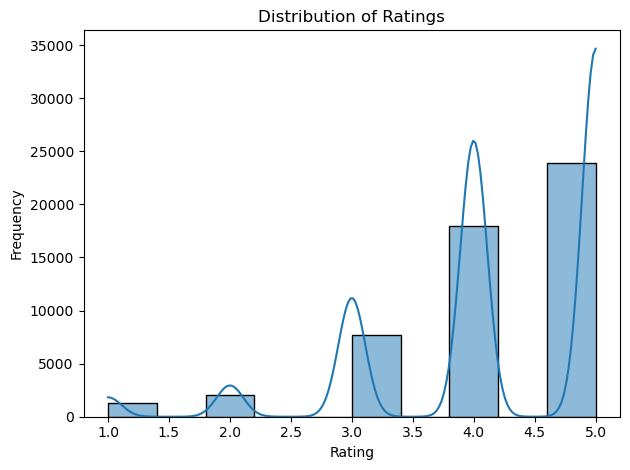

In [19]:

#  Rating Distribution

plt.figure()
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [20]:

df["Rating"] = df["Rating"].fillna(df["Rating"].median())
df["VisitMode"] = df["VisitMode"].fillna("Unknown")
df["UserContinent"] = df["UserContinent"].fillna("Unknown")
df["UserCountry"] = df["UserCountry"].fillna("Unknown")
df["UserCity"] = df["UserCity"].fillna("Unknown")

In [22]:
#  Drop rows due to small count
df.dropna(subset=["UserCity", "UserCityId"], inplace=True)

In [23]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
VisitMode            0
UserCityId           0
UserContinent        0
UserRegion           0
UserCountry          0
UserCity             0
dtype: int64


In [24]:

# Clamp ratings to 1-5
df["Rating"] = df["Rating"].clip(1, 5)

In [25]:
# Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

cat_cols = ["VisitMode", "UserContinent", "UserCountry", "UserRegion", "UserCity", "AttractionType"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
# Aggregate User-Level Features

user_profile = df.groupby("UserId").agg({
    "Rating": ["mean", "count"],
    "VisitMode_Encoded": pd.Series.mode
})
user_profile.columns = ["Avg_Rating_User", "Total_Visits_User", "Most_Common_Mode"]
user_profile.reset_index(inplace=True)

# Merging with original dataframe
df = df.merge(user_profile, on="UserId", how="left")

In [27]:

# Normalizing Numerical Features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Rating_Scaled", "Avg_Rating_User_Scaled"]] = scaler.fit_transform(df[["Rating", "Avg_Rating_User"]])


In [28]:
# Saving preprocessed dataset
df.to_csv("preprocessed_dataset.csv", index=False)

In [29]:
df.head(5)

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,...,UserContinent_Encoded,UserCountry_Encoded,UserRegion_Encoded,UserCity_Encoded,AttractionType_Encoded,Avg_Rating_User,Total_Visits_User,Most_Common_Mode,Rating_Scaled,Avg_Rating_User_Scaled
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,144,21,1801,8,5.0,1,1,1.0,1.0
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,1,27,12,3509,8,5.0,1,3,1.0,1.0
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,1,21,15,630,8,5.0,1,2,1.0,1.0
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,132,6,5463,8,3.0,2,2,0.5,0.5
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",...,4,144,21,2847,8,3.0,3,1,0.5,0.5


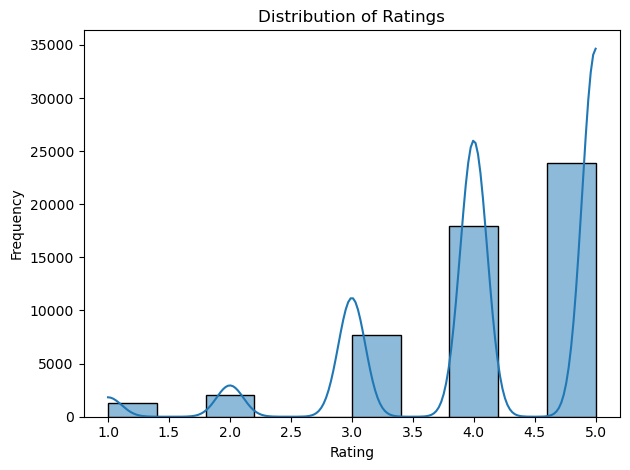

In [30]:
#  Rating Distribution

plt.figure()
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


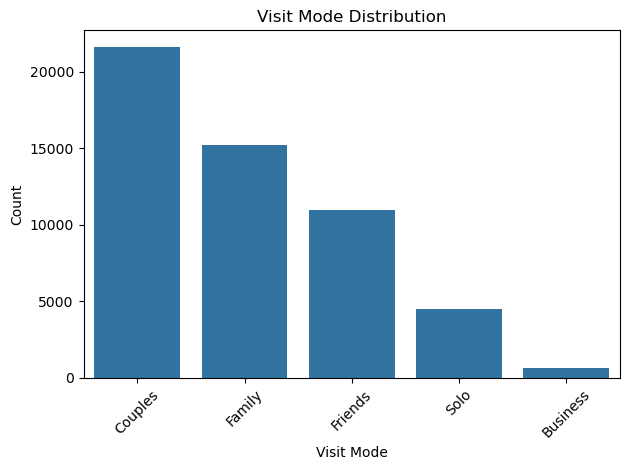

In [31]:

# Visit Mode Distribution
plt.figure()
sns.countplot(data=df, x="VisitMode", order=df["VisitMode"].value_counts().index)
plt.title("Visit Mode Distribution")
plt.xlabel("Visit Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

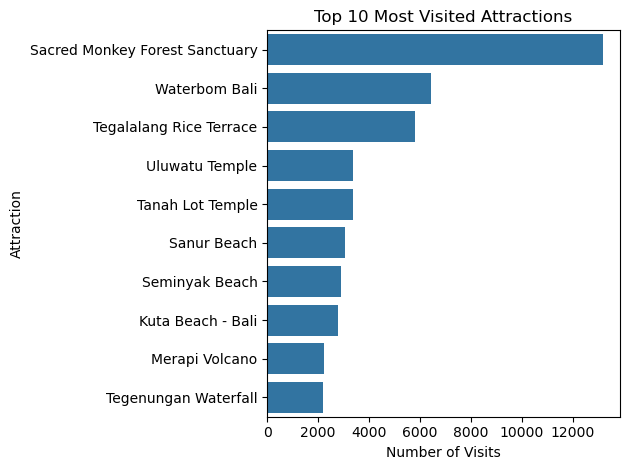

In [32]:

# Top 10 Most Visited Attractions

top_attractions = df["Attraction"].value_counts().nlargest(10)
plt.figure()
sns.barplot(x=top_attractions.values, y=top_attractions.index)
plt.title("Top 10 Most Visited Attractions")
plt.xlabel("Number of Visits")
plt.ylabel("Attraction")
plt.tight_layout()
plt.show()


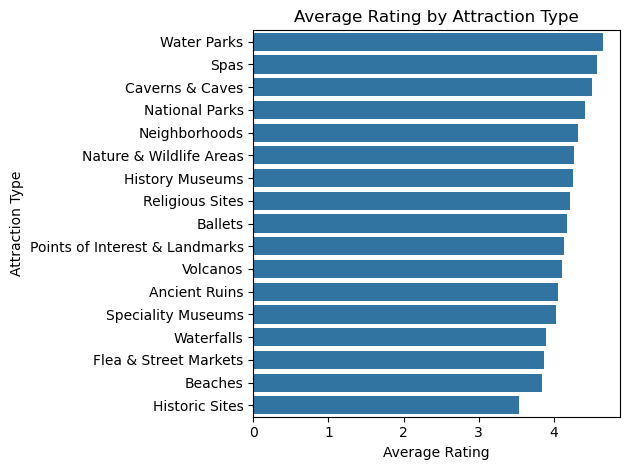

In [33]:

#  Average Rating by Attraction Type

avg_rating_by_type = df.groupby("AttractionType")["Rating"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=avg_rating_by_type.values, y=avg_rating_by_type.index)
plt.title("Average Rating by Attraction Type")
plt.xlabel("Average Rating")
plt.ylabel("Attraction Type")
plt.tight_layout()
plt.show()

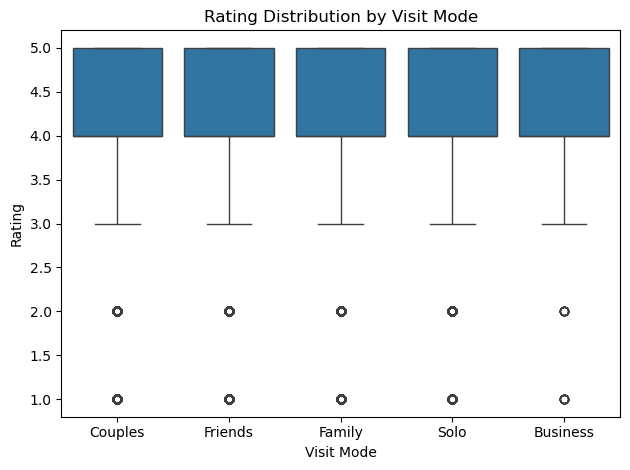

In [34]:

#  Visit Mode vs Rating

plt.figure()
sns.boxplot(x="VisitMode", y="Rating", data=df)
plt.title("Rating Distribution by Visit Mode")
plt.xlabel("Visit Mode")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

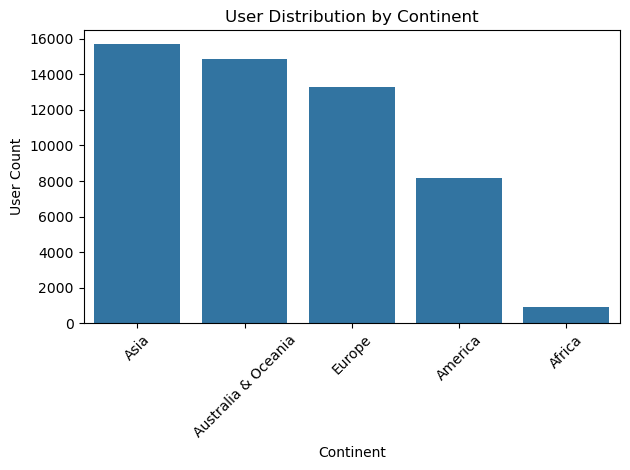

In [35]:

# Continent-wise User Distribution

plt.figure()
sns.countplot(data=df, x="UserContinent", order=df["UserContinent"].value_counts().index)
plt.title("User Distribution by Continent")
plt.xlabel("Continent")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


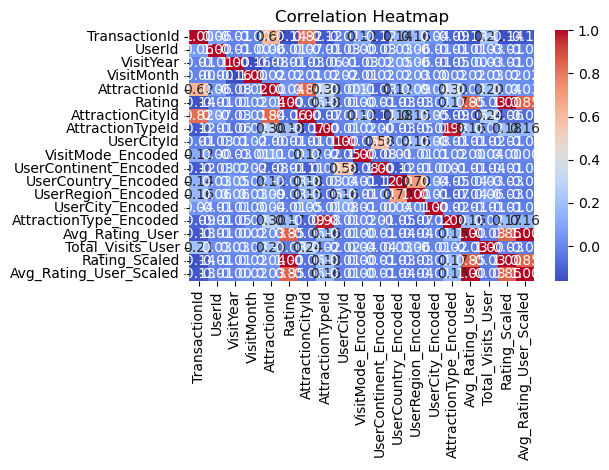

In [36]:

# Correlation Heatmap (Numerical Features)

plt.figure()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [37]:
# 1. REGRESSION TASK
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load csv file
df = pd.read_csv("preprocessed_dataset.csv")

# Defining Features and Target

features = [
    'VisitYear', 'VisitMonth',
    'UserContinent_Encoded', 'UserRegion_Encoded', 'UserCountry_Encoded', 'UserCity_Encoded',
    'AttractionType_Encoded',
    'Total_Visits_User', 'Avg_Rating_User_Scaled'
]

X = df[features]
y = df["Rating"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate Model

y_pred = model.predict(X_test)

print("Regression Results")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Regression Results
R² Score: 0.6659107026025105
RMSE: 0.5634062553034054


c:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
#2. CLASSIFICATION TASK — Predict Visit Mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X = df[features]
y = df["VisitMode_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Classifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


# Evaluate

y_pred = clf.predict(X_test)

print(" Classification Results")
print(classification_report(y_test, y_pred))

 Classification Results
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       135
           1       0.57      0.73      0.64      4337
           2       0.56      0.54      0.55      2995
           3       0.48      0.36      0.41      2190
           4       0.58      0.28      0.38       928

    accuracy                           0.55     10585
   macro avg       0.54      0.44      0.47     10585
weighted avg       0.55      0.55      0.54     10585



3. RECOMMENDATION TASKS
 A. Collaborative Filtering (using Surprise)

In [1]:
from surprise import Dataset, SVD
print("scikit-surprise is working!")

scikit-surprise is working!


In [2]:
conda activate recommender



Note: you may need to restart the kernel to use updated packages.



CondaError: Run 'conda init' before 'conda activate'



In [3]:
conda install pandas

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

#  Load the CSV file 
df = pd.read_csv("preprocessed_dataset.csv")


required_columns = {"UserId", "AttractionId", "Rating"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"CSV must contain columns: {required_columns}")


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["UserId", "AttractionId", "Rating"]], reader)

#Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#Train the SVD model
model = SVD()
model.fit(trainset)

# Predict and evaluate
predictions = model.test(testset)
print(" Collaborative Filtering RMSE:", accuracy.rmse(predictions))
print("Collaborative Filtering MAE:", accuracy.mae(predictions))

RMSE: 0.9165
 Collaborative Filtering RMSE: 0.9164920827861777
MAE:  0.7154
Collaborative Filtering MAE: 0.715424943075081


In [5]:
user_id = 12345  

# Getting all attractions user hasn't rated
rated_items = df[df["UserId"] == user_id]["AttractionId"].unique()
all_items = df["AttractionId"].unique()
unseen_items = [item for item in all_items if item not in rated_items]

# Predicting scores for unseen attractions
preds = [model.predict(user_id, item) for item in unseen_items]
top_preds = sorted(preds, key=lambda x: x.est, reverse=True)[:5]

print("Top 5 Recommendations:")
for p in top_preds:
    name = df[df["AttractionId"] == p.iid]["Attraction"].iloc[0]
    print(f"{name} → Predicted Rating: {p.est:.2f}")

Top 5 Recommendations:
Waterbom Bali → Predicted Rating: 4.65
Mount Semeru Volcano → Predicted Rating: 4.63
Bromo Tengger Semeru National Park → Predicted Rating: 4.62
Jomblang Cave → Predicted Rating: 4.53
Khayangan Reflexology & Massage → Predicted Rating: 4.47


B. Content-Based Filtering (Based on Attraction Features)

In [6]:
pip install pandas scikit-learn matplotlib seaborn scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.metrics.pairwise import cosine_similarity


item_features = df.groupby("AttractionId")[["AttractionType_Encoded", "UserCountry_Encoded"]].mean()
similarity_matrix = cosine_similarity(item_features)

# Recommend similar attractions for a given attraction
attraction_id = 640 
index = item_features.index.get_loc(attraction_id)
similar_scores = list(enumerate(similarity_matrix[index]))
sorted_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

print("Attractions similar to:", df[df["AttractionId"] == attraction_id]["Attraction"].iloc[0])
for idx, score in sorted_scores:
    similar_id = item_features.index[idx]
    name = df[df["AttractionId"] == similar_id]["Attraction"].iloc[0]
    print(f"{name} → Similarity: {score:.2f}")

Attractions similar to: Sacred Monkey Forest Sanctuary
Bromo Tengger Semeru National Park → Similarity: 1.00
Water Castle (Tamansari) → Similarity: 1.00
Sempu Island → Similarity: 1.00
Tegalalang Rice Terrace → Similarity: 1.00
Kalibiru National Park → Similarity: 1.00


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
import pickle
import numpy as np


df = pd.read_csv("preprocessed_dataset.csv")

feature_cols = [
    "VisitYear", "VisitMonth",
    "UserContinent", "UserRegion", "UserCountry", "UserCity",
    "AttractionType",
    "Total_Visits_User", "Avg_Rating_User_Scaled"
]

categorical_cols = ["UserContinent", "UserRegion", "UserCountry", "UserCity", "AttractionType", "VisitMode"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")  # Save encoder

# Define Regression Inputs/Outputs
regression_features = [
    "VisitYear", "VisitMonth",
    "UserContinent_Encoded", "UserRegion_Encoded", "UserCountry_Encoded", "UserCity_Encoded",
    "AttractionType_Encoded",
    "Total_Visits_User", "Avg_Rating_User_Scaled"
]
regression_target = "Rating"

# Train Regression Model
X_reg = df[regression_features]
y_reg = df[regression_target]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Evaluate and Save Regression Model

y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Results")
print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))) 
pickle.dump(reg_model, open("regression_model.pkl", "wb"))

# Define Classification Inputs/Outputs
classification_target = "VisitMode_Encoded"
X_clf = df[regression_features]  # same features
y_clf = df["VisitMode_Encoded"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Evaluate and Save Classification Model
y_pred_clf = clf_model.predict(X_test_clf)
print("\nClassification Results")
print(classification_report(y_test_clf, y_pred_clf))
pickle.dump(clf_model, open("classification_model.pkl", "wb"))

Regression Results
R² Score: 0.6659107026025105
RMSE: 0.5634062553034054

Classification Results
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       135
           1       0.57      0.73      0.64      4337
           2       0.56      0.54      0.55      2995
           3       0.48      0.36      0.41      2190
           4       0.58      0.28      0.38       928

    accuracy                           0.55     10585
   macro avg       0.54      0.44      0.47     10585
weighted avg       0.55      0.55      0.54     10585



In [9]:
import pandas as pd
import joblib
import pickle

# Load trained models
with open("regression_model.pkl", "rb") as f:
    reg_model = pickle.load(f)

with open("classification_model.pkl", "rb") as f:
    clf_model = pickle.load(f)

# Load label encoders into dictionary
label_encoders = {}
columns_to_encode = ["UserContinent", "UserRegion", "UserCountry", "UserCity", "AttractionType", "VisitMode"]

for col in columns_to_encode:
    label_encoders[col] = joblib.load(f"{col}_encoder.pkl")


In [ ]:
# test case
user_input = {
    "VisitYear": 2025,
    "VisitMonth": 7,
    "UserContinent": "Europe",
    "UserRegion": "Western Europe",
    "UserCountry": "France",
    "UserCity": "Paris",
    "AttractionType": "Nature & Wildlife Areas",
    "Total_Visits_User": 5,
    "Avg_Rating_User_Scaled": 0.8
}


def safe_encode(encoder, value):
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        print(f" '{value}' not seen during training. Using default class.")
        return -1 


encoded_input = {
    "VisitYear": user_input["VisitYear"],
    "VisitMonth": user_input["VisitMonth"],
    "UserContinent_Encoded": safe_encode(label_encoders["UserContinent"], user_input["UserContinent"]),
    "UserRegion_Encoded": safe_encode(label_encoders["UserRegion"], user_input["UserRegion"]),
    "UserCountry_Encoded": safe_encode(label_encoders["UserCountry"], user_input["UserCountry"]),
    "UserCity_Encoded": safe_encode(label_encoders["UserCity"], user_input["UserCity"]),
    "AttractionType_Encoded": safe_encode(label_encoders["AttractionType"], user_input["AttractionType"]),
    "Total_Visits_User": user_input["Total_Visits_User"],
    "Avg_Rating_User_Scaled": user_input["Avg_Rating_User_Scaled"]
}

#  Convert to DataFrame
X_input = pd.DataFrame([encoded_input])

#  Predict Rating (Regression)
predicted_rating = reg_model.predict(X_input)[0]
print(f"Predicted Rating: {predicted_rating:.2f} / 5")

#  Predict Visit Mode (Classification)
predicted_mode_code = clf_model.predict(X_input)[0]
predicted_mode = label_encoders["VisitMode"].inverse_transform([predicted_mode_code])[0]
print(f" Predicted Visit Mode: {predicted_mode}")

Predicted Rating: 4.27 / 5
 Predicted Visit Mode: Couples


In [13]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

#  Load the CSV
df = pd.read_csv("preprocessed_dataset.csv")  

# Define database connection info
user = "root"
password = "" 
host = "localhost"
port = "3306"
database = "tourism_db"

# Create engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

#  Upload to MySQL 
df.to_sql("preprocessed_data", con=engine, index=False, if_exists="replace")

print(" Data uploaded to MySQL successfully!")

 Data uploaded to MySQL successfully!
